/var/folders/23/w4tbl1wj5815_fthtszrj23h0000gn/T/ipykernel_6923/2809593664.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  baseline_fhr = np.full_like(fhr_data, np.nan, dtype=np.float)


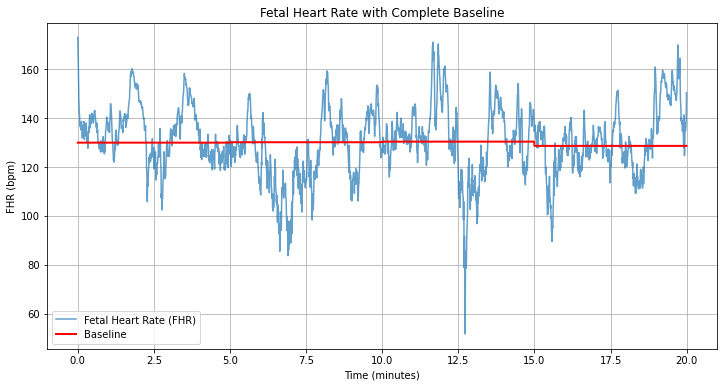

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend


fhr_data = np.load('model_dir_conditional/generated/normal/1009_0.npy')
fhr_data = fhr_data + 25
# detrend
fhr_data = detrend(fhr_data) + np.mean(fhr_data)

# 参数定义
sampling_rate = 2  # 采样率 (Hz)
window_duration = 10 * 60  # 基线计算窗口时间（秒）
window_size = window_duration * sampling_rate  # 窗口大小（采样点数）
step_duration = 5 * 60  # 滑动窗口步长（秒）
step_size = step_duration * sampling_rate  # 步长大小（采样点数）

# 初始化基线数据
baseline_fhr = np.full_like(fhr_data, np.nan, dtype=np.float)

# 计算基线
for start in range(0, len(fhr_data), step_size):
    end = min(start + window_size, len(fhr_data))
    window = fhr_data[start:end]
    accelerations = window > (np.median(window) + 15)
    decelerations = window < (np.median(window) - 15)
    filtered_window = window[~accelerations & ~decelerations]
    baseline = np.median(filtered_window)
    baseline_fhr[start:end] = baseline

# 时间轴 (以分钟计)
time_minutes = np.arange(len(fhr_data)) / (sampling_rate * 60)

# 绘制原始数据和基线
plt.figure(figsize=(12, 6))
plt.plot(time_minutes, fhr_data, label='Fetal Heart Rate (FHR)', alpha=0.7)
plt.plot(time_minutes, baseline_fhr, label='Baseline', linewidth=2, color='red')
plt.xlabel('Time (minutes)')
plt.ylabel('FHR (bpm)')
plt.title('Fetal Heart Rate with Complete Baseline')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import numpy as np
from scipy.io import savemat
import os


def saveasmat(fhr_path):
    fhr = np.load(fhr_path)
    savepath = fhr_path[:-4] + '.mat'
    savemat(savepath, {'fhr': fhr})


path = 'model_dir_conditional/generated/abnormal'

for file in os.listdir('model_dir_conditional/generated/abnormal'):
    if file.endswith('.npy'):
        filepath = os.path.join(path, file)
        saveasmat(filepath)

In [7]:
files = sorted(os.listdir('model_dir_conditional/generated/FHR/all'))
for file in files:
    if file.endswith('.png'):
        print(file)

bl_1001_0a.png
bl_1001_0b.png
bl_1001_1a.png
bl_1001_1b.png
bl_1001_2a.png
bl_1001_2b.png
bl_1001_3a.png
bl_1001_3b.png
bl_1002_0a.png
bl_1002_0b.png
bl_1002_1a.png
bl_1002_1b.png
bl_1002_2a.png
bl_1002_2b.png
bl_1002_3a.png
bl_1002_3b.png
bl_1009_0a.png
bl_1009_0b.png
bl_1009_1a.png
bl_1009_1b.png
bl_1009_2a.png
bl_1009_2b.png
bl_1009_3a.png
bl_1009_3b.png
bl_1010_0a.png
bl_1010_0b.png
bl_1010_1a.png
bl_1010_1b.png
bl_1010_2a.png
bl_1010_2b.png
bl_1010_3a.png
bl_1010_3b.png
bl_1012_0a.png
bl_1012_0b.png
bl_1012_1a.png
bl_1012_1b.png
bl_1012_2a.png
bl_1012_2b.png
bl_1014_0a.png
bl_1014_0b.png
bl_1014_1a.png
bl_1014_1b.png
bl_1014_2a.png
bl_1014_2b.png
bl_1014_3a.png
bl_1014_3b.png
bl_1015_1a.png
bl_1015_1b.png
bl_1016_0a.png
bl_1016_0b.png
bl_1016_1a.png
bl_1016_1b.png
bl_1016_2a.png
bl_1016_2b.png
bl_1017_0a.png
bl_1017_0b.png
bl_1017_1a.png
bl_1017_1b.png
bl_1017_2a.png
bl_1017_2b.png
bl_1017_3a.png
bl_1017_3b.png
bl_1028_0a.png
bl_1028_0b.png
bl_1028_1a.png
bl_1028_1b.png
bl_1029_0a